# Image Classifier: Animals, Buidings and Landscapes using DL and ML

### Dataset: The dataset consists of three classes, Animals, Buidings and Landscapes. Each class has 100 images. The images are in Jpeg format.

### Importing essential libraries

In [1]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import os
import pickle
import splitfolders

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Checking the versions of essential libraries imported above

In [3]:
tf.__version__

'2.5.0'

In [4]:
pd.__version__

'1.0.5'

In [5]:
np.__version__

'1.19.5'

In [6]:
print(pickle.format_version)

4.0


In [7]:
sn.__version__

'0.10.1'

### Splitting the folders for training, testing and validation.

In [8]:
input_folder = "..."
output = "..."
splitfolders.ratio(input_folder, output, seed = 42, ratio=(.8, .1, .1))

Copying files: 300 files [00:02, 126.88 files/s]


In [9]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [10]:
img_height, img_width = (224,224)
batch_size = 10

train_data_dir = "..."
valid_data_dir = "..."
test_data_dir = "..."

### Generating Data and dimensions of our images

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                validation_split = 0.4)

train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size = (img_height, img_width),
                batch_size = batch_size,
                class_mode = 'categorical',
                subset='training')         #set as training data

validation_generator = train_datagen.flow_from_directory(
                valid_data_dir,       #same directory as training data
                target_size = (img_height, img_width),
                batch_size = batch_size,
                class_mode = 'categorical', #2-D one hot encoded labels
                subset='validation')    #set as validation data

Found 162 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [12]:
test_generator = train_datagen.flow_from_directory(
                test_data_dir,
                target_size = (img_height, img_width),
                batch_size = 1,
                class_mode = 'categorical',
                subset='training')

Found 18 images belonging to 3 classes.


### Current data info.: Initially checking for no. of entries in each input data class

In [13]:
#Number of images in Animals class in Input_data folder

Animals = len(os.listdir("..."))

In [14]:
Animals

100

In [15]:
#Number of images in Buildings class in Input_data folder

Buildings = len(os.listdir("..."))

In [16]:
Buildings

100

In [17]:
#Number of images in Landscapes class in Input_data folder

Landscapes = len(os.listdir("..."))

In [18]:
Landscapes

100

### Displaying the three classes

In [19]:
placed_no = [Animals,Buildings,Landscapes]

In [20]:
stat = ['Animals', 'Buldings', 'Landscapes']

In [21]:
colors = [ 'brown' , 'orange' , 'red']

([<matplotlib.patches.Wedge at 0x17c30d5fee0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Animals'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Buldings'),
  Text(0.5500001486524352, -0.9526278583383436, 'Landscapes')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

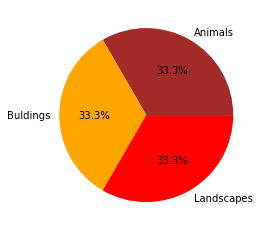

In [22]:
plt.pie(placed_no , labels = stat , colors=colors , autopct= '%0.1f%%')

In [23]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [24]:
y.shape

(1, 3)

In [25]:
train_generator.num_classes

3

### Model Fitting

In [26]:
#Training the CNN on the Training set and evaluating it on the Test set

base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs = 30)

Epoch 1/30
17/17 [==============================] - 18s 742ms/step - loss: 2.1231 - accuracy: 0.6358
Epoch 2/30
17/17 [==============================] - 13s 713ms/step - loss: 0.2747 - accuracy: 0.9012
Epoch 3/30
17/17 [==============================] - 13s 752ms/step - loss: 0.1299 - accuracy: 0.9568
Epoch 4/30
17/17 [==============================] - 12s 706ms/step - loss: 0.1195 - accuracy: 0.9568
Epoch 5/30
17/17 [==============================] - 12s 694ms/step - loss: 0.1179 - accuracy: 0.9630
Epoch 6/30
17/17 [==============================] - 12s 697ms/step - loss: 0.1216 - accuracy: 0.9877
Epoch 7/30
17/17 [==============================] - 12s 684ms/step - loss: 0.1024 - accuracy: 0.9568
Epoch 8/30
17/17 [==============================] - 12s 676ms/step - loss: 0.0707 - accuracy: 0.9753
Epoch 9/30
17/17 [==============================] - 12s 699ms/step - loss: 0.1017 - accuracy: 0.9568
Epoch 10/30
17/17 [==============================] - 12s 699ms/step - loss: 0.1250 - accura

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### Saving the model 

In [28]:
model.save('Image Classification between Animals, Buildings and Landscapes.h5')

### Accuracy

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


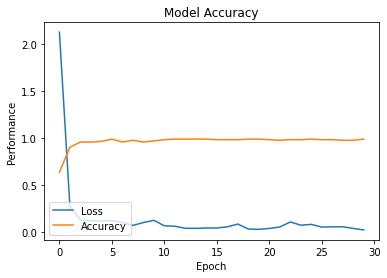

In [30]:
# As per the training of the dataset, the plot shows the loss and accuracy of the model
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Performance')
plt.xlabel('Epoch')
plt.legend(["Loss","Accuracy"], loc='lower left')
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\n Test Accuracy = ', test_acc)

18/18 - 3s - loss: 0.1797 - accuracy: 0.8333

 Test Accuracy =  0.8333333134651184


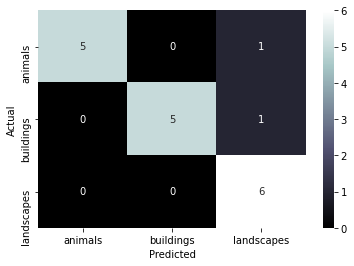

Test Accuracy = 88.88888888888889


In [32]:
model = tf.keras.models.load_model('Image Classification between Animals, Buildings and Landscapes.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='bone', annot=True)
plt.show()
print('Test Accuracy = {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

### Predicting

In [33]:
# Printing the predicted class

print(predicted_class)

['animals', 'landscapes', 'landscapes', 'buildings', 'animals', 'landscapes', 'buildings', 'landscapes', 'animals', 'animals', 'landscapes', 'landscapes', 'buildings', 'buildings', 'animals', 'landscapes', 'landscapes', 'buildings']


In [34]:
# Printing the actual class

print(actual_class)

['animals', 'landscapes', 'buildings', 'buildings', 'animals', 'landscapes', 'buildings', 'landscapes', 'animals', 'animals', 'landscapes', 'landscapes', 'buildings', 'buildings', 'animals', 'animals', 'landscapes', 'buildings']


In [35]:
#Loading Model

model = load_model('Image Classification between Animals, Buildings and Landscapes.h5')

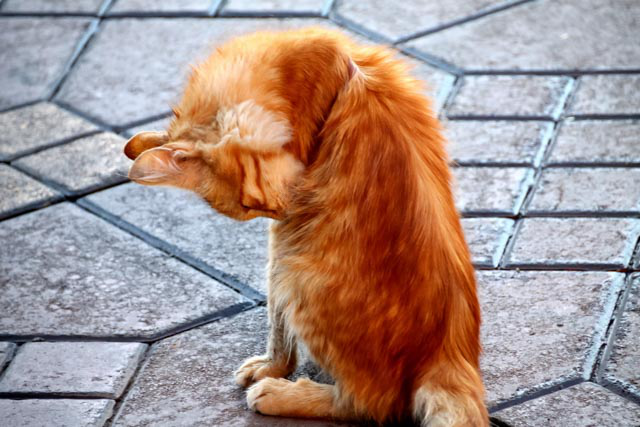

In [36]:
# Loading self selected Image of an animal

image.load_img("...")

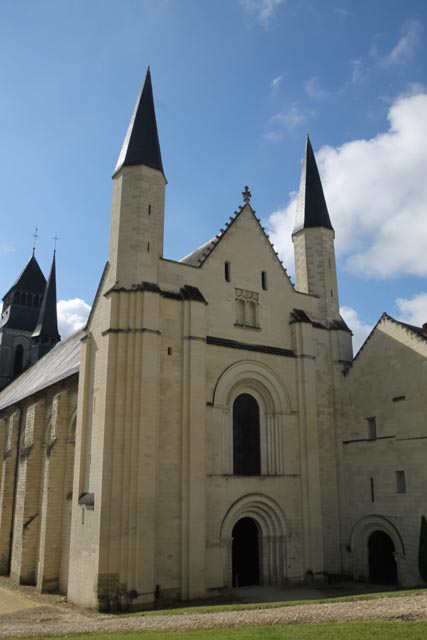

In [37]:
# Loading self selected Image of a building

image.load_img("...")

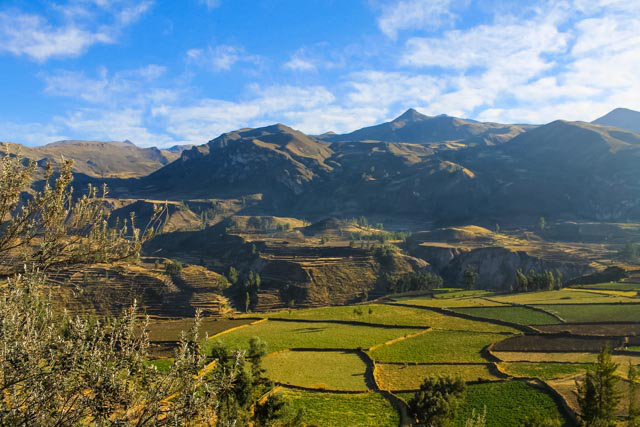

In [38]:
# Loading self selected Image of a landscape

image.load_img("...")

In [39]:
# Assigning for easier prediction

mypred={0:"Animal",1:"Building",2:"Landscape"}

In [40]:
# Predicting whether the loaded image is an Animal, Building or Landscape

test_image = image.load_img("...", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
print('Result = ',mypred[x])

Result =  Animal


In [41]:
# Predicting whether the loaded image is an Animal, Building or Landscape

test_image = image.load_img("...", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
print('Result = ',mypred[x])

Result =  Building


In [42]:
# Predicting whether the loaded image is an Animal, Building or Landscape

test_image = image.load_img("...", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=np.argmax(result)
print('Result = ',mypred[x])

Result =  Landscape
